# Seminar 4 - Answers

The data file <b>birthweight_smoking.xls</b> contains data for a random sample of babies born in Pennsylvania in 1989. 

The data include the baby's birth weight together with various characteristics of the mother, including whether she smoked during her pregnancy.

You can download the data from [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/birthweight_smoking.xlsx).

A detailed description is given [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Birthweight_Smoking_Description.pdf). 

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

In the exercises below we will investigate the relationship between birth weight and smoking during pregnancy.

Using this dataset, answer the following questions:

In [1]:
# Importing useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf

In [2]:
# Loading the data set

df = pd.read_excel("birthweight_smoking.xlsx")
df

,nprevist,alcohol,tripre1,tripre2,tripre3,tripre0,birthweight,smoker,unmarried,educ,age,drinks
0,12,0,1,0,0,0,4253,1,1,12,27,0
1,5,0,0,1,0,0,3459,0,0,16,24,0
2,12,0,1,0,0,0,2920,1,0,11,23,0
3,13,0,1,0,0,0,2600,0,0,17,28,0
4,9,0,1,0,0,0,3742,0,0,13,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,0,0,1,0,0,2520,0,0,12,42,0
2996,10,0,1,0,0,0,3062,0,0,17,27,0
2997,11,0,0,1,0,0,3799,0,0,12,28,0
2998,10,0,1,0,0,0,2070,1,0,11,21,0


<b>
1. What is the average value of Birthweight for all mothers?
</b>

In [3]:
avg_birthweight = np.mean(df.birthweight)

print(f"The average birthweight is {round(avg_birthweight,2)}")

The average birthweight is 3382.93


<b>
2. What is the average value of Birthweight for mothers who smoke?
</b>

In [4]:
avg_birthweight_smoker = np.mean(df.birthweight[df.smoker == 1])

print(f"The average birthweight for mothers who smoke is {round(avg_birthweight_smoker,2)}")

The average birthweight for mothers who smoke is 3178.83


<b>
3. What is the average value of Birthweight for mothers who do not smoke?
</b>

In [5]:
avg_birthweight_non_smoker = np.mean(df.birthweight[df.smoker == 0])

print( f"The average birthweight for mothers who do not smoke is {round(avg_birthweight_non_smoker,2)}")

The average birthweight for mothers who do not smoke is 3432.06


<b>
4. Use the data in the sample to estimate the difference in average birth weight for smoking and nonsmoking mothers.
</b>

In [6]:
avg_diff = avg_birthweight_smoker - avg_birthweight_non_smoker

print(f"The estimated difference in average birthweight for smoking and nonsmoking mothers is {round(avg_diff,2)}")

The estimated difference in average birthweight for smoking and nonsmoking mothers is -253.23


<b>
5. What is the standard error for the estimated difference in 4.?
</b>

In [7]:
std_birthweight_smoker = np.std(df.birthweight[df.smoker == 1])
std_birthweight_non_smoker = np.std(df.birthweight[df.smoker == 0])

se_diff = np.sqrt(std_birthweight_smoker**2/len(df.birthweight[df.smoker == 1])+std_birthweight_non_smoker**2/len(df.birthweight[df.smoker == 0]))

print(f"The standard error for the estimated average difference in birthweight for smoking and nonsmoking mothers is {round(se_diff,2)}")

The standard error for the estimated average difference in birthweight for smoking and nonsmoking mothers is 26.8


<b>
6. Construct a 95% confidence interval for the difference in the average birth weight for smoking and nonsmoking mothers.
</b>

In [8]:
ll_ci = avg_diff - 1.96*se_diff

ul_ci = avg_diff + 1.96*se_diff

print(f"The 95% confidence interval for the average difference in birthweight for smoking and nonsmoking mothers is {round(ll_ci,2),round(ul_ci,2)}")

The 95% confidence interval for the average difference in birthweight for smoking and nonsmoking mothers is (-305.76, -200.7)


<b>
7. Run a regression of <i>birthweight</i> on the binary variable <i>smoker</i>. Explain how the estimated slope and intercept are related to your answers in 2, 3 and 4.
</b>

In [9]:
formula = 'birthweight ~ smoker'

model = smf.ols(formula,df).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     88.28
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.09e-20
Time:                        12:38:50   Log-Likelihood:                -23364.
No. Observations:                3000   AIC:                         4.673e+04
Df Residuals:                    2998   BIC:                         4.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3432.0600     11.871    289.115      0.0

The birthweight of babies from mothers who do not smoke during the pregnancy ($smoker_i=0$) is 34320.06 (intercept) and the birthweight of babies from mothers who do smoke during the pregnancy ($smoker_i=1$) is 3432.06 - 253.23 (intercept - slope). 

This difference is statistically significance as the p-value of the slope is less than 5%.

<b>
8. Do you think smoking is uncorrelated with other factors that cause low birth weight? That is, do you think that the regression error term $u_i$ has a conditional mean of 0 given <i>$smoker_i$</i>? What other variables available if ommited could lead to ommited variable bias?
</b>

If smoking is a result of a series of poor health choices, it is likely that smoking is correlated to other factors that might affect baby birth weight.

Alcohol and Nprevist are examples of such variables that should be included in the regression.

<b>
9. Run a regression of birthweight and number of prenatal visits. Interpret the coefficient results. Is the coefficient for the number of prenatal visits variable significant?
</b>

In [10]:
formula4 = 'birthweight ~ nprevist'

model4 = smf.ols(formula4,df).fit() 
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     163.4
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.78e-36
Time:                        12:38:51   Log-Likelihood:                -23328.
No. Observations:                3000   AIC:                         4.666e+04
Df Residuals:                    2998   BIC:                         4.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2979.9315     33.237     89.657      0.0

Yes, the coefficient for <i>nprevist</i> is significant since 
    
$$ t = \frac{36.6643}{2.868} = 12.784 $$
    
Which is greater than 1.96, so we reject the null hypothesis that the coefficient equals 0.
    
Alternatively, note that the p-value is 0.00 < 5%, the significance level.

<b>
10. Draw a Residual plot to investigate for the presence of heteroskedaticity. Does the residual plot suggest the existence of heteroskedasticity? 
</b>

Text(0, 0.5, 'Residuals')

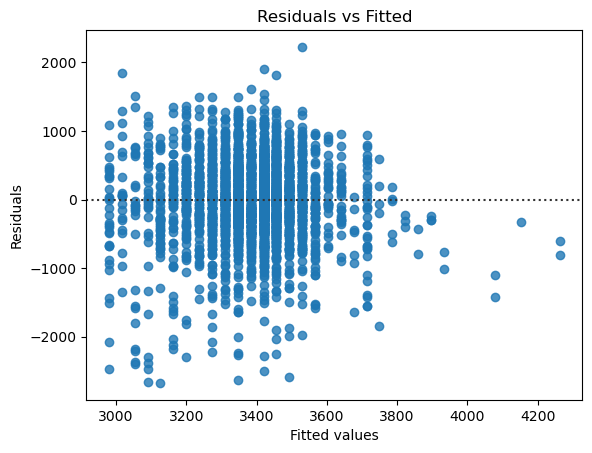

In [11]:
# Residual Plot to investigate for the presence of Heteroskedasticity

residual_plot = plt.figure()
sns.residplot(data=df, x=model4.fittedvalues, y='birthweight')

residual_plot.axes[0].set_title('Residuals vs Fitted')
residual_plot.axes[0].set_xlabel('Fitted values')
residual_plot.axes[0].set_ylabel('Residuals')

The residual plot shows that for smaller fitted values, the variability of residuals is large and for larger fitted values, the variability is small, suggesting the presence of heteroskedasticity. 

<b>
11. Implement the Breusch-Pagan test for heteroskedasticity. Interpret the results.
</b>

In [12]:
# Conducting the Breusch-Pagan Test for heteroskedasticity

name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']

test = smd.het_breuschpagan(model4.resid, model4.model.exog)

lzip(name, test)

[('Lagrange multiplier statistic', 38.51981500986168),
 ('p-value', 5.420058953408722e-10),
 ('f-value', 38.99482629830587),
 ('f p-value', 4.849420025847477e-10)]

Since the p-value of the F statistic is below 5% we can reject the null hypothesis of homoskedastic errors.

<b>
12. Run the regression of birthweight on number of prenatal visits this time using heterokedastic robust standard errors. Is there any difference from the results of the previous regression?
</b>

In [13]:
model_hr = smf.ols(formula4, df).fit(cov_type = "HC0")     # Running the regression with heteroskedasticity-robust standard errors
print(model_hr.summary())                                 # Print out the result of the regression

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     99.63
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           4.20e-23
Time:                        12:38:54   Log-Likelihood:                -23328.
No. Observations:                3000   AIC:                         4.666e+04
Df Residuals:                    2998   BIC:                         4.667e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2979.9315     43.506     68.494      0.0

<b>13. Run a regression of <i>birthweight</i> on the variables <i>smoker</i> and <i>nprevist</i>. What is the estimated regression equation?
</b>

In [15]:
formula5 = 'birthweight ~ smoker + nprevist'

model5 = smf.ols(formula5,df).fit(cov_type = "HC0")
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:            birthweight   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     89.25
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           2.25e-38
Time:                        12:39:45   Log-Likelihood:                -23294.
No. Observations:                3000   AIC:                         4.659e+04
Df Residuals:                    2997   BIC:                         4.661e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3050.5274     43.671     69.853      0.0

The estimated regression equation is
$$ \hat{birthweight} = 3050 - 218.82 smoker + 34.10 nprevist $$

<b>14. Find the estimated infant's birth weight for a mother who smoked during pregnancy and had 8 prenatal visits.
</b>

In [16]:
birthweight = model5.params.Intercept + model5.params.smoker*1 + model5.params.nprevist*8
birthweight

3104.529555228953